In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gdgdgdm/GDM.xlsx


In [2]:
import pandas as pd
import numpy as np
df = pd.read_excel('../input/gdgdgdm/GDM.xlsx')


In [3]:
conditions=[(df['1h glucose']>=7.5) | (df['OGTT 0h value']>=7.5) | (df['OGTT 1h value']>=7.5) | (df['OGTT 2h value']>=7.5),
(df['1h glucose']<7.5) | (df['OGTT 0h value']<7.5) | (df['OGTT 1h value']<7.5) | (df['OGTT 2h value']<7.5),
(df['1h glucose']=='') | (df['OGTT 0h value']=='') | (df['OGTT 1h value']=='') | (df['OGTT 2h value']=='')]

In [4]:
    choices = ['1', '0',np.NaN]
    df['GDM'] = np.select(conditions, choices, default=np.NaN)


In [5]:
df.drop(df[df['GDM']=='nan'].index, inplace = True) 

In [6]:
df.columns


Index(['systolic BP (mmHg) V1', 'diastolic BP (mmHg) V1', 'Pulse (bpm) V1',
       'Weight (kg) V1', 'Height (cm) V1', 'BMI (kg/m2) V1', 'HighRisk 10',
       'Smoking 123', 'Alcohol Intake V1', 'White 10 V1', 'PreviousGDM10 V1',
       'Meds 10 V1', 'Age >30 10', 'BMI (kg/m2) V1 2', 'Obese 10',
       'Overweight 123', 'V1 HbA1c (mmol/mol)', 'WCC', 'V1 Hb', 'V1 Platelet',
       'V1 Creatinine', 'V1 ALT', 'V1 CRP', 'V1 U protein', 'V1 U creatinine',
       'V1 PCR', 'GCT OGTT high 10', '1h glucose', 'OGTT 0h value',
       'OGTT 1h value', 'OGTT 2h value', 'GDM'],
      dtype='object')

In [7]:
df.head()

,systolic BP (mmHg) V1,diastolic BP (mmHg) V1,Pulse (bpm) V1,Weight (kg) V1,Height (cm) V1,BMI (kg/m2) V1,HighRisk 10,Smoking 123,Alcohol Intake V1,White 10 V1,...,V1 CRP,V1 U protein,V1 U creatinine,V1 PCR,GCT OGTT high 10,1h glucose,OGTT 0h value,OGTT 1h value,OGTT 2h value,GDM
0,114,58,73,59.4,169.6,20.650699,0,3,0,1,...,0.45,0.02,4.84,0.004132,0.0,NaN,4.1,7.39,3.70,0
1,178,78,84,70.1,154.9,29.215625,0,3,0,1,...,0.10,0.09,14.37,0.006263,1.0,9.66,NaN,NaN,NaN,1
2,123,62,79,64.9,157.8,26.063378,0,3,0,1,...,1.15,0.10,15.89,0.006293,0.0,5.34,NaN,NaN,NaN,0
3,115,68,82,67.1,164.7,24.736333,0,3,0,1,...,0.22,0.03,2.78,0.010791,0.0,NaN,4.5,5.84,6.66,0
4,116,61,92,67.5,169.9,23.383904,0,3,0,1,...,0.41,0.05,9.52,0.005252,0.0,NaN,4.6,4.43,3.97,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 516 entries, 0 to 599
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   systolic BP (mmHg) V1   516 non-null    int64  
 1   diastolic BP (mmHg) V1  516 non-null    int64  
 2   Pulse (bpm) V1          516 non-null    int64  
 3   Weight (kg) V1          516 non-null    float64
 4   Height (cm) V1          516 non-null    float64
 5   BMI (kg/m2) V1          516 non-null    float64
 6   HighRisk 10             516 non-null    int64  
 7   Smoking 123             516 non-null    int64  
 8   Alcohol Intake V1       516 non-null    int64  
 9   White 10 V1             516 non-null    int64  
 10  PreviousGDM10 V1        516 non-null    int64  
 11  Meds 10 V1              516 non-null    int64  
 12  Age >30 10              516 non-null    int64  
 13  BMI (kg/m2) V1 2        516 non-null    float64
 14  Obese 10                516 non-null    in

In [9]:
df1=df.dropna()

In [10]:
df1.head()

,systolic BP (mmHg) V1,diastolic BP (mmHg) V1,Pulse (bpm) V1,Weight (kg) V1,Height (cm) V1,BMI (kg/m2) V1,HighRisk 10,Smoking 123,Alcohol Intake V1,White 10 V1,...,V1 CRP,V1 U protein,V1 U creatinine,V1 PCR,GCT OGTT high 10,1h glucose,OGTT 0h value,OGTT 1h value,OGTT 2h value,GDM


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   systolic BP (mmHg) V1   0 non-null      int64  
 1   diastolic BP (mmHg) V1  0 non-null      int64  
 2   Pulse (bpm) V1          0 non-null      int64  
 3   Weight (kg) V1          0 non-null      float64
 4   Height (cm) V1          0 non-null      float64
 5   BMI (kg/m2) V1          0 non-null      float64
 6   HighRisk 10             0 non-null      int64  
 7   Smoking 123             0 non-null      int64  
 8   Alcohol Intake V1       0 non-null      int64  
 9   White 10 V1             0 non-null      int64  
 10  PreviousGDM10 V1        0 non-null      int64  
 11  Meds 10 V1              0 non-null      int64  
 12  Age >30 10              0 non-null      int64  
 13  BMI (kg/m2) V1 2        0 non-null      float64
 14  Obese 10                0 non-null      int64  
 15  O

In [12]:
df.isnull().sum()

systolic BP (mmHg) V1       0
diastolic BP (mmHg) V1      0
Pulse (bpm) V1              0
Weight (kg) V1              0
Height (cm) V1              0
BMI (kg/m2) V1              0
HighRisk 10                 0
Smoking 123                 0
Alcohol Intake V1           0
White 10 V1                 0
PreviousGDM10 V1            0
Meds 10 V1                  0
Age >30 10                  0
BMI (kg/m2) V1 2            0
Obese 10                    0
Overweight 123              0
V1 HbA1c (mmol/mol)         2
WCC                         1
V1 Hb                       1
V1 Platelet                 1
V1 Creatinine               3
V1 ALT                      2
V1 CRP                      1
V1 U protein                3
V1 U creatinine             3
V1 PCR                      3
GCT OGTT high 10            0
1h glucose                243
OGTT 0h value             273
OGTT 1h value             275
OGTT 2h value             276
GDM                         0
dtype: int64

In [13]:
df2=df.fillna(0)

In [14]:
ALTmean=df['V1 ALT'].mean()

In [15]:
df4=df.fillna({'V1 U creatinine': 0,
              'V1 ALT':ALTmean})

In [16]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 516 entries, 0 to 599
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   systolic BP (mmHg) V1   516 non-null    int64  
 1   diastolic BP (mmHg) V1  516 non-null    int64  
 2   Pulse (bpm) V1          516 non-null    int64  
 3   Weight (kg) V1          516 non-null    float64
 4   Height (cm) V1          516 non-null    float64
 5   BMI (kg/m2) V1          516 non-null    float64
 6   HighRisk 10             516 non-null    int64  
 7   Smoking 123             516 non-null    int64  
 8   Alcohol Intake V1       516 non-null    int64  
 9   White 10 V1             516 non-null    int64  
 10  PreviousGDM10 V1        516 non-null    int64  
 11  Meds 10 V1              516 non-null    int64  
 12  Age >30 10              516 non-null    int64  
 13  BMI (kg/m2) V1 2        516 non-null    float64
 14  Obese 10                516 non-null    in

In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 516 entries, 0 to 599
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   systolic BP (mmHg) V1   516 non-null    int64  
 1   diastolic BP (mmHg) V1  516 non-null    int64  
 2   Pulse (bpm) V1          516 non-null    int64  
 3   Weight (kg) V1          516 non-null    float64
 4   Height (cm) V1          516 non-null    float64
 5   BMI (kg/m2) V1          516 non-null    float64
 6   HighRisk 10             516 non-null    int64  
 7   Smoking 123             516 non-null    int64  
 8   Alcohol Intake V1       516 non-null    int64  
 9   White 10 V1             516 non-null    int64  
 10  PreviousGDM10 V1        516 non-null    int64  
 11  Meds 10 V1              516 non-null    int64  
 12  Age >30 10              516 non-null    int64  
 13  BMI (kg/m2) V1 2        516 non-null    float64
 14  Obese 10                516 non-null    in

* 17  WCC                     515 non-null    float64
*  18  V1 Hb                   515 non-null    float64
*  19  V1 Platelet             515 non-null    float64
*  20  V1 Creatinine           513 non-null    float64
*  21  V1 ALT                  514 non-null    float64
*  22  V1 CRP                  515 non-null    float64
*  23  V1 U protein            513 non-null    float64
*  24  V1 U creatinine         513 non-null    float64
*  25  V1 PCR                  513 non-null    float64
*  27  1h glucose              273 non-null    float64
*  28  OGTT 0h value           243 non-null    float64
*  29  OGTT 1h value           241 non-null    float64
*  30  OGTT 2h value 

In [18]:
Meangl=df['1h glucose'].mean()
Meangl

6.153846153846155

In [19]:
df3=df['1h glucose'].fillna(Meangl)

In [20]:
df3

0      6.153846
1      9.660000
2      5.340000
3      6.153846
4      6.153846
         ...   
595    6.153846
596    6.153846
597    4.230000
598    8.100000
599    6.153846
Name: 1h glucose, Length: 516, dtype: float64

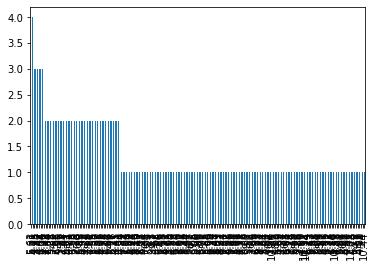

In [21]:
df['1h glucose'].value_counts().plot.bar()

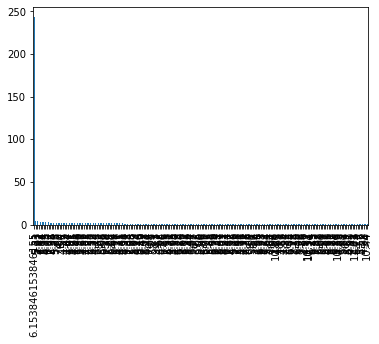

In [22]:
df3.value_counts().plot.bar()

In [23]:
df5=df['1h glucose'].fillna(method="ffill")

In [24]:
df['1h glucose'].head(10)

0      NaN
1     9.66
2     5.34
3      NaN
4      NaN
5      NaN
6     7.15
7     7.92
9      NaN
10     NaN
Name: 1h glucose, dtype: float64

In [25]:
df5.head(10)

0      NaN
1     9.66
2     5.34
3     5.34
4     5.34
5     5.34
6     7.15
7     7.92
9     7.92
10    7.92
Name: 1h glucose, dtype: float64

In [26]:
df6=df['1h glucose'].fillna(method="bfill")

In [27]:
df['1h glucose'].head(10)

0      NaN
1     9.66
2     5.34
3      NaN
4      NaN
5      NaN
6     7.15
7     7.92
9      NaN
10     NaN
Name: 1h glucose, dtype: float64

In [28]:
df6.head(10)

0     9.66
1     9.66
2     5.34
3     7.15
4     7.15
5     7.15
6     7.15
7     7.92
9     4.20
10    4.20
Name: 1h glucose, dtype: float64

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
X= df.iloc[:,:25]

In [31]:
y=df['GDM']

In [32]:
#X=X.drop(['Alcohol Intake V1','White 10 V1'], axis=1)

In [33]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [34]:

## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [35]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [37]:
# Loading the XGBClassifier class from xgboost library
xgb_classifier = xgb.XGBClassifier()
print(xgb_classifier)

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)


In [38]:
random_search=RandomizedSearchCV(xgb_classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [39]:
random_search.fit(X,y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    5.3s finished


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=No

In [40]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [41]:
random_search.best_params_

{'min_child_weight': 5,
 'max_depth': 3,
 'learning_rate': 0.05,
 'gamma': 0.3,
 'colsample_bytree': 0.3}

In [42]:

xgb_classifier=xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=5,
              min_child_weight=7, missing=np.nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [43]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(xgb_classifier,X,y,cv=10)

In [44]:
score

array([0.71153846, 0.75      , 0.78846154, 0.78846154, 0.67307692,
       0.73076923, 0.70588235, 0.76470588, 0.68627451, 0.78431373])

In [45]:
score.mean()

0.7383484162895927

In [46]:


# Fitting the model with train data.
xgb_classifier.fit(X_train, y_train)


# Predicting the test data
y_pred = xgb_classifier.predict(X_test)
print(y_pred)

# Evaluate predictions
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("XGBClassifier RMSE:    %f" % (rmse))

['0' '0' '0' '0' '0' '1' '0' '1' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '1' '0' '0' '1' '0' '0' '0' '0' '1' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '1'
 '0' '0' '0' '0' '0' '0' '0' '1' '0' '1' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '1' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '1' '0' '0']
Accuracy: 75.00%
XGBClassifier RMSE:    0.500000


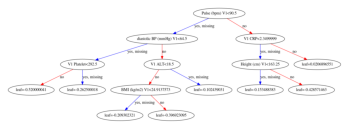

In [47]:
import matplotlib.pyplot as plt
xgb.plot_tree(xgb_classifier,num_trees=0)
plt.rcParams['figure.figsize'] = [55, 100]
plt.show()

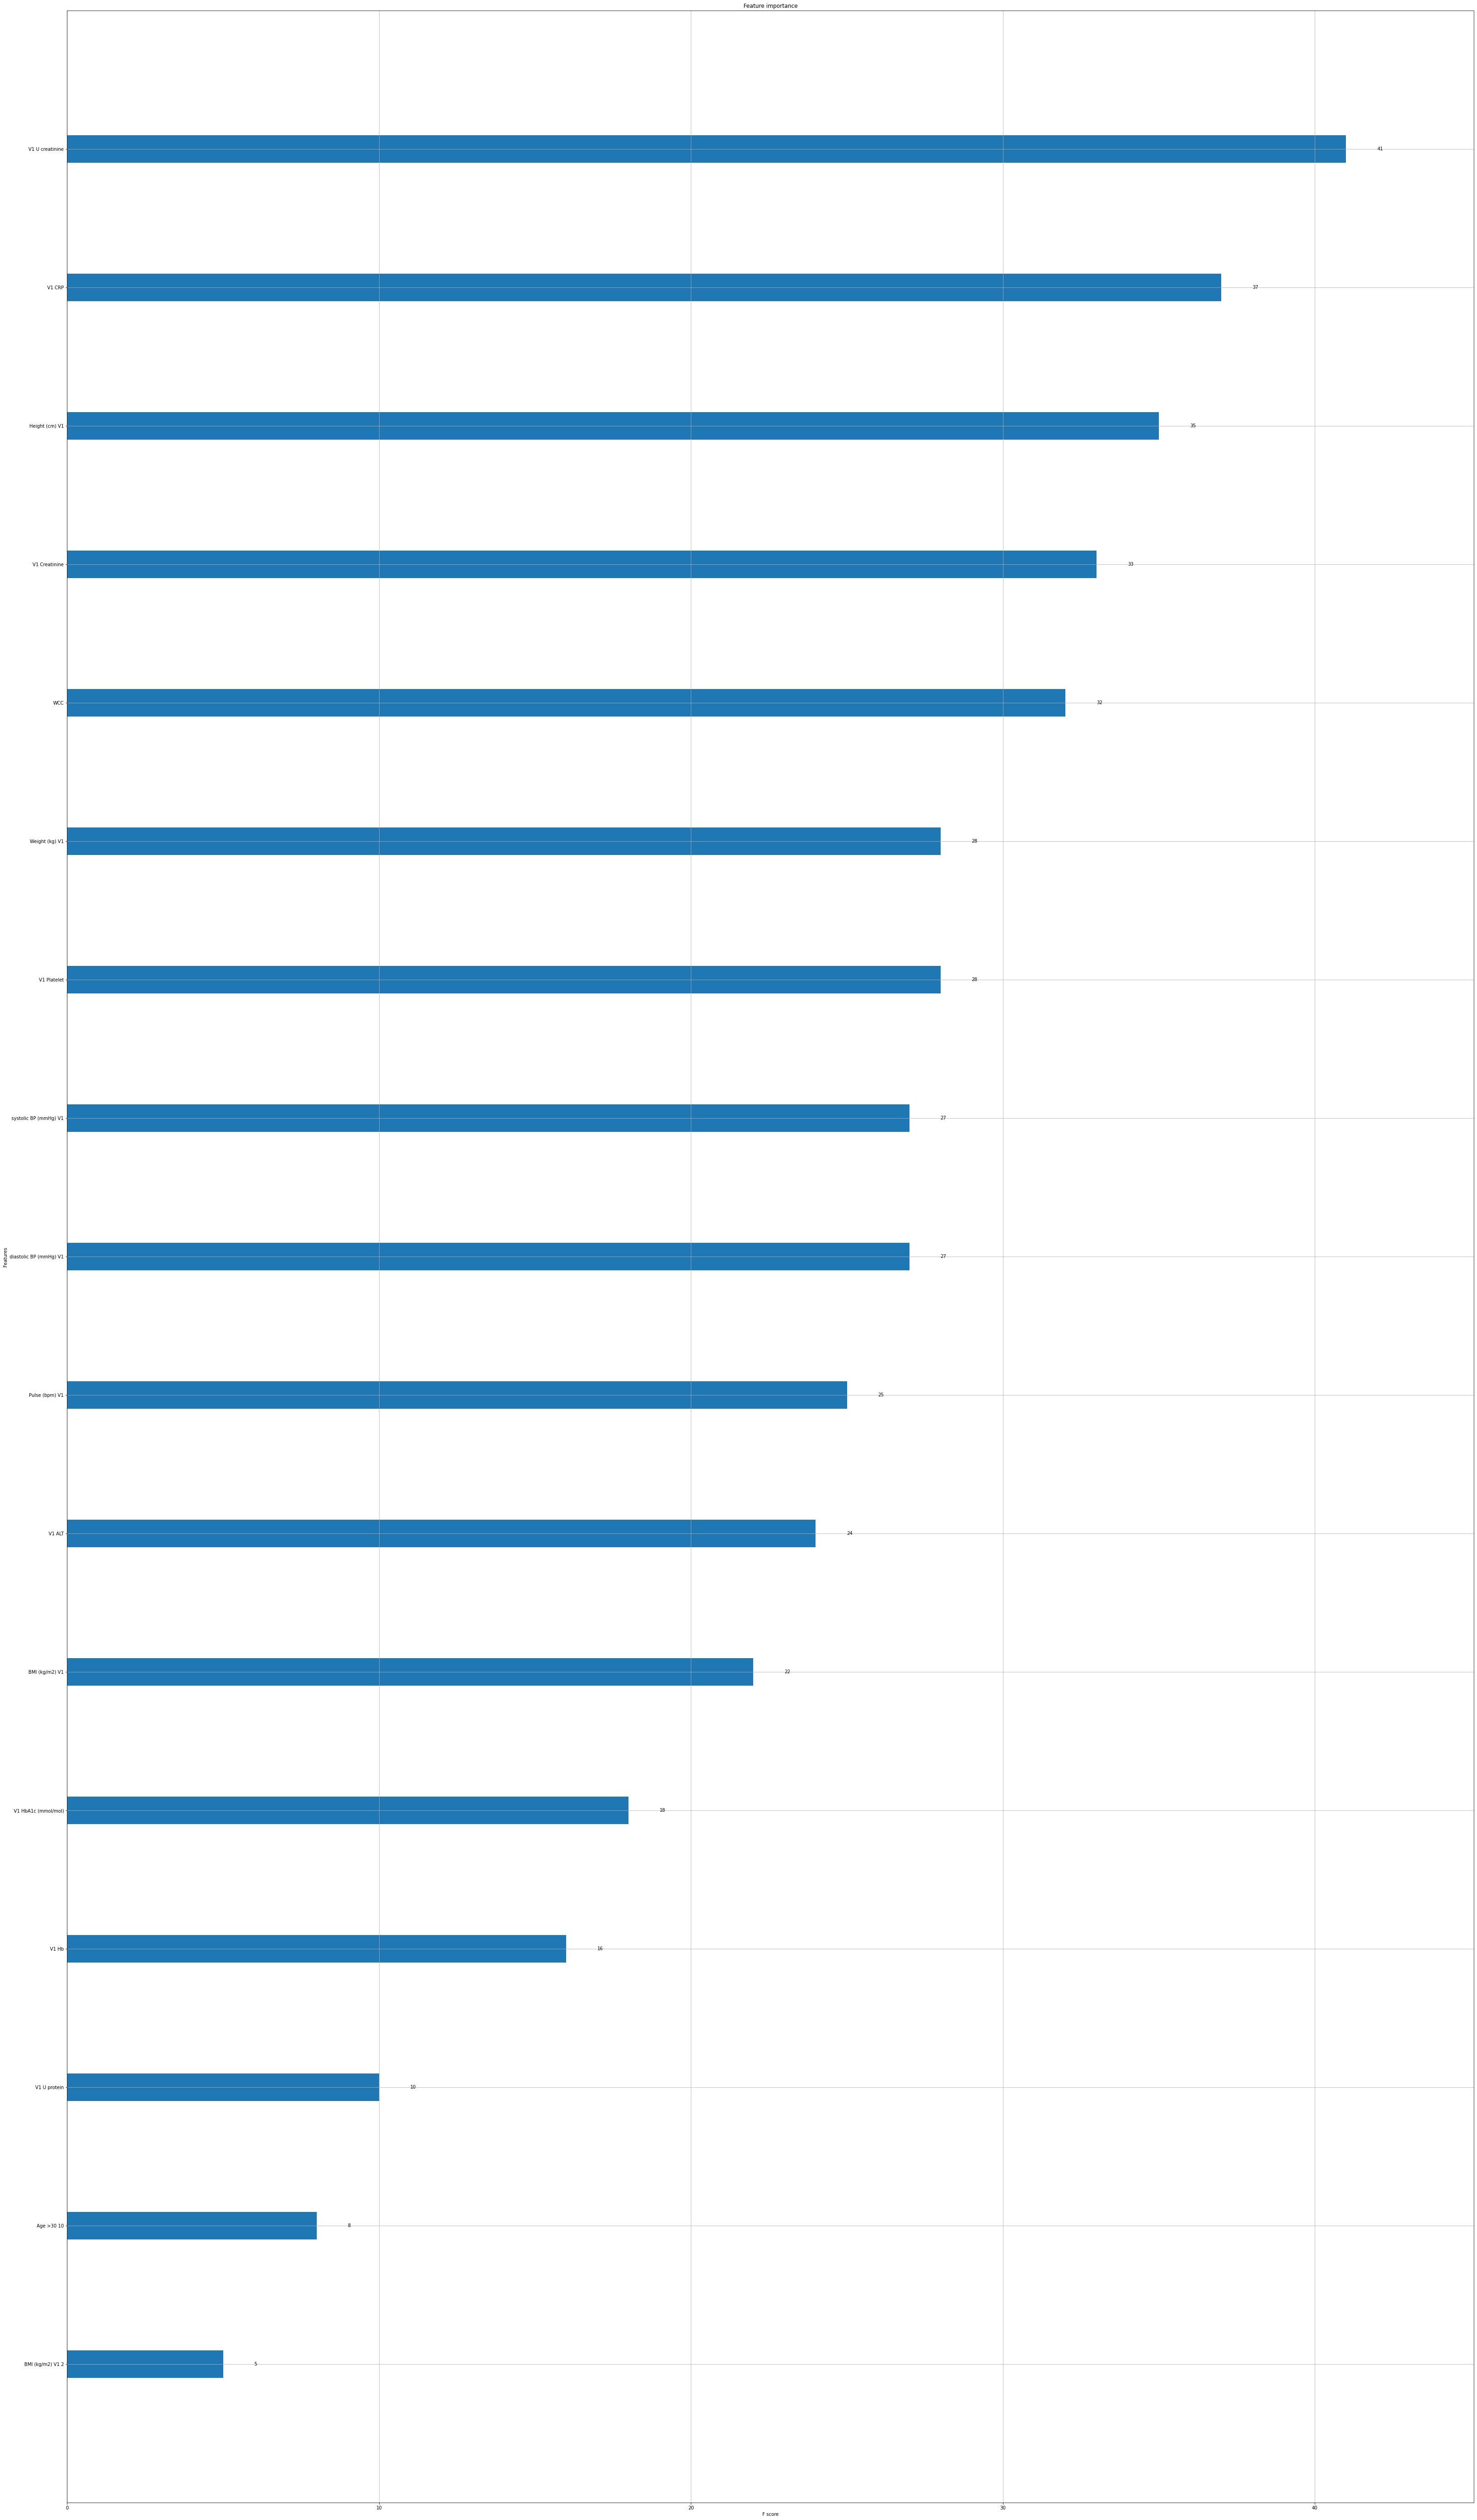

In [48]:
import matplotlib.pyplot as plt
xgb.plot_importance(xgb_classifier)
plt.rcParams['figure.figsize']=[150,15]
plt.show()

In [49]:
from sklearn.experimental import enable_iterative_imputer

In [50]:

from sklearn.impute import IterativeImputer

In [51]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 516 entries, 0 to 599
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   systolic BP (mmHg) V1   516 non-null    int64  
 1   diastolic BP (mmHg) V1  516 non-null    int64  
 2   Pulse (bpm) V1          516 non-null    int64  
 3   Weight (kg) V1          516 non-null    float64
 4   Height (cm) V1          516 non-null    float64
 5   BMI (kg/m2) V1          516 non-null    float64
 6   HighRisk 10             516 non-null    int64  
 7   Smoking 123             516 non-null    int64  
 8   Alcohol Intake V1       516 non-null    int64  
 9   White 10 V1             516 non-null    int64  
 10  PreviousGDM10 V1        516 non-null    int64  
 11  Meds 10 V1              516 non-null    int64  
 12  Age >30 10              516 non-null    int64  
 13  BMI (kg/m2) V1 2        516 non-null    float64
 14  Obese 10                516 non-null    in

In [52]:
import numpy as np
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
imp = IterativeImputer(estimator=lr,missing_values=np.nan, tol=1e-10, max_iter=100, verbose=2, imputation_order='roman')
imp.fit_transform(X)

[IterativeImputer] Completing matrix with shape (516, 25)
[IterativeImputer] Ending imputation round 1/100, elapsed time 0.07
[IterativeImputer] Change: 25.058036059686707, scaled tolerance: 1.017e-07 
[IterativeImputer] Ending imputation round 2/100, elapsed time 0.10
[IterativeImputer] Change: 2.9709066581884436, scaled tolerance: 1.017e-07 
[IterativeImputer] Ending imputation round 3/100, elapsed time 0.13
[IterativeImputer] Change: 0.3348964890637216, scaled tolerance: 1.017e-07 
[IterativeImputer] Ending imputation round 4/100, elapsed time 0.15
[IterativeImputer] Change: 0.035668912026892485, scaled tolerance: 1.017e-07 
[IterativeImputer] Ending imputation round 5/100, elapsed time 0.18
[IterativeImputer] Change: 0.0037191368300319994, scaled tolerance: 1.017e-07 
[IterativeImputer] Ending imputation round 6/100, elapsed time 0.21
[IterativeImputer] Change: 0.00038486574749363456, scaled tolerance: 1.017e-07 
[IterativeImputer] Ending imputation round 7/100, elapsed time 0.24
[

array([[1.140e+02, 5.800e+01, 7.300e+01, ..., 4.500e-01, 2.000e-02,
        4.840e+00],
       [1.780e+02, 7.800e+01, 8.400e+01, ..., 1.000e-01, 9.000e-02,
        1.437e+01],
       [1.230e+02, 6.200e+01, 7.900e+01, ..., 1.150e+00, 1.000e-01,
        1.589e+01],
       ...,
       [1.150e+02, 6.900e+01, 8.100e+01, ..., 1.800e+01, 6.000e-02,
        6.200e+00],
       [1.290e+02, 6.900e+01, 8.400e+01, ..., 7.500e+00, 3.000e-02,
        3.400e+00],
       [1.100e+02, 5.300e+01, 6.400e+01, ..., 4.400e+00, 5.000e-02,
        6.200e+00]])

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [54]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score  
# Create and fit model 
clf = RandomForestClassifier(n_estimators = 50, random_state = 11850) 
clf = clf.fit(imp.transform(X_train), y_train)  
preds = clf.predict(imp.transform(X_test))  # Get predictions  

[IterativeImputer] Completing matrix with shape (412, 25)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.00
[IterativeImputer] Ending imputation round 2/10, elapsed time 0.00
[IterativeImputer] Ending imputation round 3/10, elapsed time 0.01
[IterativeImputer] Ending imputation round 4/10, elapsed time 0.01
[IterativeImputer] Ending imputation round 5/10, elapsed time 0.01
[IterativeImputer] Ending imputation round 6/10, elapsed time 0.01
[IterativeImputer] Ending imputation round 7/10, elapsed time 0.01
[IterativeImputer] Ending imputation round 8/10, elapsed time 0.02
[IterativeImputer] Ending imputation round 9/10, elapsed time 0.02
[IterativeImputer] Ending imputation round 10/10, elapsed time 0.02
[IterativeImputer] Completing matrix with shape (104, 25)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.00
[IterativeImputer] Ending imputation round 2/10, elapsed time 0.00
[IterativeImputer] Ending imputation round 3/10, elapsed time 0.00
[IterativeIm

In [55]:
round(accuracy_score(y_true = y_test, y_pred = preds), 3)

0.769

In [56]:
clf = RandomForestClassifier(n_estimators = 30, random_state = 2298)
clf = clf.fit(imp.transform(X_train), y_train)  
preds = clf.predict(imp.transform(X_test))  # Get predictions

[IterativeImputer] Completing matrix with shape (412, 25)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.00
[IterativeImputer] Ending imputation round 2/10, elapsed time 0.01
[IterativeImputer] Ending imputation round 3/10, elapsed time 0.01
[IterativeImputer] Ending imputation round 4/10, elapsed time 0.01
[IterativeImputer] Ending imputation round 5/10, elapsed time 0.01
[IterativeImputer] Ending imputation round 6/10, elapsed time 0.01
[IterativeImputer] Ending imputation round 7/10, elapsed time 0.02
[IterativeImputer] Ending imputation round 8/10, elapsed time 0.02
[IterativeImputer] Ending imputation round 9/10, elapsed time 0.02
[IterativeImputer] Ending imputation round 10/10, elapsed time 0.02
[IterativeImputer] Completing matrix with shape (104, 25)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.00
[IterativeImputer] Ending imputation round 2/10, elapsed time 0.00
[IterativeImputer] Ending imputation round 3/10, elapsed time 0.00
[IterativeIm

In [57]:
round(accuracy_score(y_true = y_test, y_pred = preds), 3)

0.769

In [58]:
from sklearn.impute import KNNImputer

In [59]:
knn = KNNImputer(n_neighbors=5, add_indicator=True)

In [60]:
knn.fit(X)

KNNImputer(add_indicator=True)

In [61]:

knn.transform(X)

array([[114.,  58.,  73., ...,   0.,   0.,   0.],
       [178.,  78.,  84., ...,   0.,   0.,   0.],
       [123.,  62.,  79., ...,   0.,   0.,   0.],
       ...,
       [115.,  69.,  81., ...,   0.,   0.,   0.],
       [129.,  69.,  84., ...,   0.,   0.,   0.],
       [110.,  53.,  64., ...,   0.,   0.,   0.]])

In [62]:
clf = RandomForestClassifier(n_estimators = 50, random_state = 11850) 
clf = clf.fit(knn.transform(X_train), y_train)  
preds = clf.predict(knn.transform(X_test))  # Get predictions  

In [63]:
round(accuracy_score(y_true = y_test, y_pred = preds), 3)

0.76

In [64]:
clf = RandomForestClassifier(n_estimators = 30, random_state = 2298)
clf = clf.fit(knn.transform(X_train), y_train)  
preds = clf.predict(knn.transform(X_test))  # Get predictions 

In [65]:
round(accuracy_score(y_true = y_test, y_pred = preds), 3)

0.808

In [66]:
from sklearn.pipeline import FeatureUnion, make_pipeline

In [67]:
impknn = make_pipeline(imp, knn)

In [68]:
clf = RandomForestClassifier(n_estimators = 30, random_state = 2298)
clf = clf.fit(impknn.transform(X_train), y_train)  
preds = clf.predict(impknn.transform(X_test))  # Get predictions 

[IterativeImputer] Completing matrix with shape (412, 25)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.00
[IterativeImputer] Ending imputation round 2/10, elapsed time 0.00
[IterativeImputer] Ending imputation round 3/10, elapsed time 0.01
[IterativeImputer] Ending imputation round 4/10, elapsed time 0.01
[IterativeImputer] Ending imputation round 5/10, elapsed time 0.01
[IterativeImputer] Ending imputation round 6/10, elapsed time 0.01
[IterativeImputer] Ending imputation round 7/10, elapsed time 0.02
[IterativeImputer] Ending imputation round 8/10, elapsed time 0.02
[IterativeImputer] Ending imputation round 9/10, elapsed time 0.02
[IterativeImputer] Ending imputation round 10/10, elapsed time 0.02
[IterativeImputer] Completing matrix with shape (104, 25)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.00
[IterativeImputer] Ending imputation round 2/10, elapsed time 0.00
[IterativeImputer] Ending imputation round 3/10, elapsed time 0.00
[IterativeIm

In [69]:
round(accuracy_score(y_true = y_test, y_pred = preds), 3)

0.769

In [70]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps=[('i', IterativeImputer()), ('m', RandomForestClassifier())])

In [71]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('i', IterativeImputer()), ('m', RandomForestClassifier())])

In [72]:
preds = pipeline.predict(X_test)

In [73]:
round(accuracy_score(y_true = y_test, y_pred = preds), 3)

0.769

In [74]:
import numpy as np
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
imp = IterativeImputer(estimator=lr,missing_values=np.nan, tol=1e-10, max_iter=100, verbose=2, imputation_order='roman')
X=imp.fit_transform(X)

[IterativeImputer] Completing matrix with shape (516, 25)
[IterativeImputer] Ending imputation round 1/100, elapsed time 0.03
[IterativeImputer] Change: 25.058036059686707, scaled tolerance: 1.017e-07 
[IterativeImputer] Ending imputation round 2/100, elapsed time 0.05
[IterativeImputer] Change: 2.9709066581884436, scaled tolerance: 1.017e-07 
[IterativeImputer] Ending imputation round 3/100, elapsed time 0.08
[IterativeImputer] Change: 0.3348964890637216, scaled tolerance: 1.017e-07 
[IterativeImputer] Ending imputation round 4/100, elapsed time 0.11
[IterativeImputer] Change: 0.035668912026892485, scaled tolerance: 1.017e-07 
[IterativeImputer] Ending imputation round 5/100, elapsed time 0.13
[IterativeImputer] Change: 0.0037191368300319994, scaled tolerance: 1.017e-07 
[IterativeImputer] Ending imputation round 6/100, elapsed time 0.16
[IterativeImputer] Change: 0.00038486574749363456, scaled tolerance: 1.017e-07 
[IterativeImputer] Ending imputation round 7/100, elapsed time 0.19
[

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [76]:
clf = RandomForestClassifier(n_estimators = 50, random_state = 11850) 
clf = clf.fit(X_train, y_train)  
preds = clf.predict(X_test)  # Get predictions  

In [77]:
round(accuracy_score(y_true = y_test, y_pred = preds), 3)

0.769

In [78]:
X

array([[1.140e+02, 5.800e+01, 7.300e+01, ..., 4.500e-01, 2.000e-02,
        4.840e+00],
       [1.780e+02, 7.800e+01, 8.400e+01, ..., 1.000e-01, 9.000e-02,
        1.437e+01],
       [1.230e+02, 6.200e+01, 7.900e+01, ..., 1.150e+00, 1.000e-01,
        1.589e+01],
       ...,
       [1.150e+02, 6.900e+01, 8.100e+01, ..., 1.800e+01, 6.000e-02,
        6.200e+00],
       [1.290e+02, 6.900e+01, 8.400e+01, ..., 7.500e+00, 3.000e-02,
        3.400e+00],
       [1.100e+02, 5.300e+01, 6.400e+01, ..., 4.400e+00, 5.000e-02,
        6.200e+00]])

In [79]:
df

,systolic BP (mmHg) V1,diastolic BP (mmHg) V1,Pulse (bpm) V1,Weight (kg) V1,Height (cm) V1,BMI (kg/m2) V1,HighRisk 10,Smoking 123,Alcohol Intake V1,White 10 V1,...,V1 CRP,V1 U protein,V1 U creatinine,V1 PCR,GCT OGTT high 10,1h glucose,OGTT 0h value,OGTT 1h value,OGTT 2h value,GDM
0,114,58,73,59.4,169.6,20.650699,0,3,0,1,...,0.45,0.02,4.84,0.004132,0.0,NaN,4.10,7.39,3.70,0
1,178,78,84,70.1,154.9,29.215625,0,3,0,1,...,0.10,0.09,14.37,0.006263,1.0,9.66,NaN,NaN,NaN,1
2,123,62,79,64.9,157.8,26.063378,0,3,0,1,...,1.15,0.10,15.89,0.006293,0.0,5.34,NaN,NaN,NaN,0
3,115,68,82,67.1,164.7,24.736333,0,3,0,1,...,0.22,0.03,2.78,0.010791,0.0,NaN,4.50,5.84,6.66,0
4,116,61,92,67.5,169.9,23.383904,0,3,0,1,...,0.41,0.05,9.52,0.005252,0.0,NaN,4.60,4.43,3.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,127,72,89,57.6,159.7,22.584613,0,3,0,1,...,2.60,0.12,10.70,0.011215,0.0,NaN,3.95,6.83,4.82,0
596,138,63,98,94.5,156.9,38.387155,0,1,0,1,...,15.40,0.12,9.70,0.012371,1.0,NaN,6.19,11.01,7.17,1
597,115,69,81,93.1,162.6,35.213452,0,2,0,1,...,18.00,0.06,6.20,0.009677,0.0,4.23,NaN,NaN,NaN,0
598,129,69,84,78.4,177.4,24.912014,0,3,0,1,...,7.50,0.03,3.40,0.008824,1.0,8.10,NaN,NaN,NaN,1
